# SPAM CLASSIFICATION

## Import Libraries

In [1]:
import os

In [16]:
# Data Handling Libraries
import pandas as pd
import numpy as np

In [17]:
# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# ML Libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense , LSTM , Embedding , Dropout , Activation , Flatten
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

## DATA Preprocessing

In [8]:
DATA_DIR = "./spam.csv"

data = pd.read_csv(DATA_DIR,delimiter=',',encoding='latin-1')

In [9]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Removing Unecessary Columns

In [10]:
columns = list(data.columns)

In [14]:
data = data.drop(columns[2:],axis=1)

In [18]:
data.head(4)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


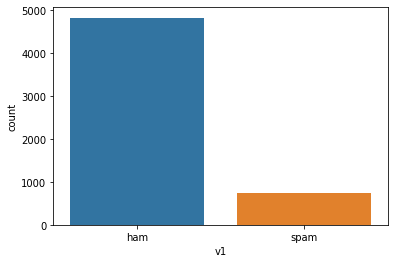

In [20]:
sns.countplot(data.v1)

In [26]:
# Applying Label Encoder
le = LabelEncoder()
X = data['v2']
y = data['v1']
y = le.fit_transform(y)

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2)

In [44]:
max_word = 1000
max_len = 250
token = Tokenizer(num_words = max_word)
token.fit_on_texts(X_train)
sequences = token.texts_to_sequences(X_train)
seq_matrix = pad_sequences(sequences , maxlen = max_len)

## Creating Model

In [39]:
class model:
  model = None

  def __init__(self):
    
    # Creating Sequential Pipeline
    self.model = Sequential()

    # Creating LSTM Layers
    self.model.add(Embedding(max_word , 32 , input_length = max_len))
    self.model.add(LSTM(64))
    self.model.add(Flatten())

    self.model.add(Dense(64, activation='relu'))
    self.model.add(Dense(32,activation='relu'))
    
    self.model.add(Dropout(0.5))
    self.model.add(Dense(16, activation='relu'))

    self.model.add(Dense(1, activation='sigmoid'))

    # Compiling
    self.model.compile(loss='binary_crossentropy',metrics='acc')
  
  def save_model(self,model_dir='model.h5'):
    self.model.save(model_dir)
  
  def laod_model(self,model_dir='model.h5'):
    self.model = tf.keras.models.load_model(model_dir)
    

## Model Training

In [40]:
model_inst = model()

In [50]:
history = model_inst.model.fit(seq_matrix,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 22s 194ms/step - loss: 0.0115 - acc: 0.9972 - val_loss: 0.0998 - val_acc: 0.9821
Epoch 2/10
112/112 [==============================] - 16s 141ms/step - loss: 0.0057 - acc: 0.9989 - val_loss: 0.1297 - val_acc: 0.9798
Epoch 3/10
112/112 [==============================] - 15s 132ms/step - loss: 0.0057 - acc: 0.9992 - val_loss: 0.1697 - val_acc: 0.9865
Epoch 4/10
112/112 [==============================] - 15s 133ms/step - loss: 0.0081 - acc: 0.9992 - val_loss: 0.1558 - val_acc: 0.9854
Epoch 5/10
112/112 [==============================] - 15s 133ms/step - loss: 0.7416 - acc: 0.9689 - val_loss: 0.1887 - val_acc: 0.9854
Epoch 6/10
112/112 [==============================] - 21s 190ms/step - loss: 0.1349 - acc: 0.9843 - val_loss: 0.2431 - val_acc: 0.9854
Epoch 7/10
112/112 [==============================] - 15s 132ms/step - loss: 0.0454 - acc: 0.9916 - val_loss: 0.2274 - val_acc: 0.9854
Epoch 8/10
112/112 [==============================] - 1

Text(0, 0.5, 'Accuracy')

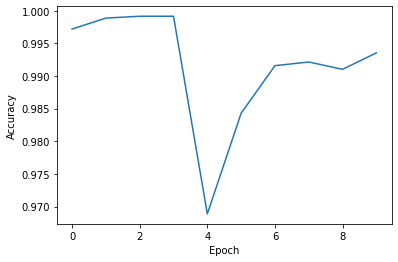

In [54]:
plt.plot(history.history['acc'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


## Testing

In [63]:
test_sequences = token.texts_to_sequences(X_test)
seq_matrix = pad_sequences(sequences , maxlen = max_len)
results = model_inst.model.predict(seq_matrix)

140/140 [==============================] - 6s 44ms/step


In [60]:
predictions = [np.argmax(valu) for valu in results]
print(predictions)